# EDA Business Analytics


Shilpi Ghosal

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('SampleSuperstore.csv')
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [3]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
df.duplicated().sum()

17

In [15]:
df.drop_duplicates(subset=None,keep= 'first',inplace=True)

In [16]:
df.duplicated().sum()

0

# Plotting the correlation graph

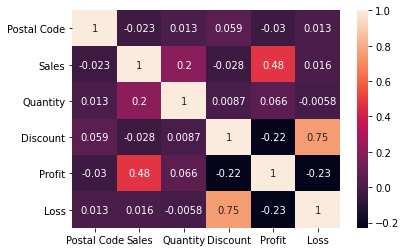

In [17]:
sns.heatmap(df.corr(),annot=True)

# Analysing different trends

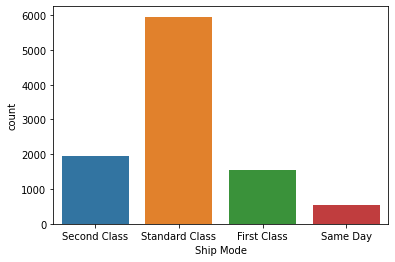

In [18]:
sns.countplot(df['Ship Mode'])

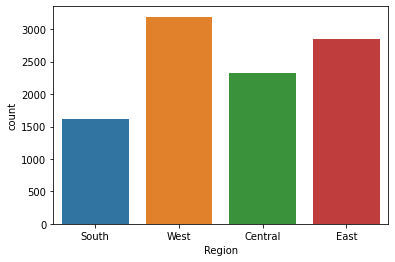

In [48]:
sns.countplot(df['Region'])

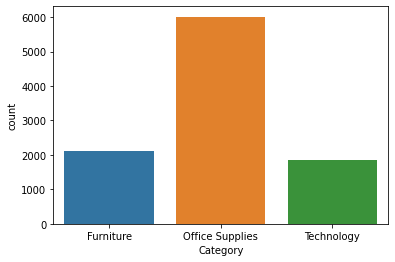

In [20]:
sns.countplot(df['Category'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

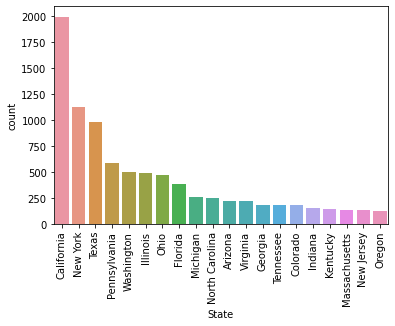

In [21]:
sns.countplot(df['State'],order=(df['State'].value_counts().head(20).index))
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

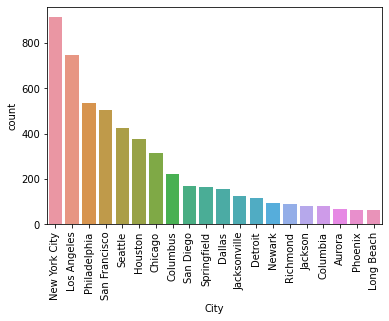

In [22]:
sns.countplot(df['City'],order=(df['City'].value_counts().head(20).index))
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

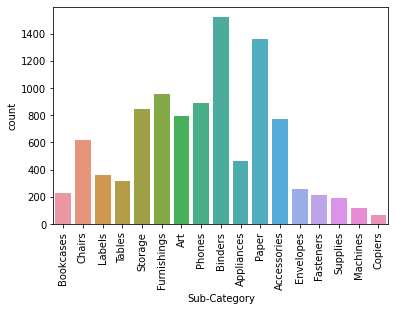

In [23]:
sns.countplot(df['Sub-Category'])
plt.xticks(rotation=90)

Text(0, 0.5, 'Profit/Loss and Sales')

<Figure size 7200x7200 with 0 Axes>

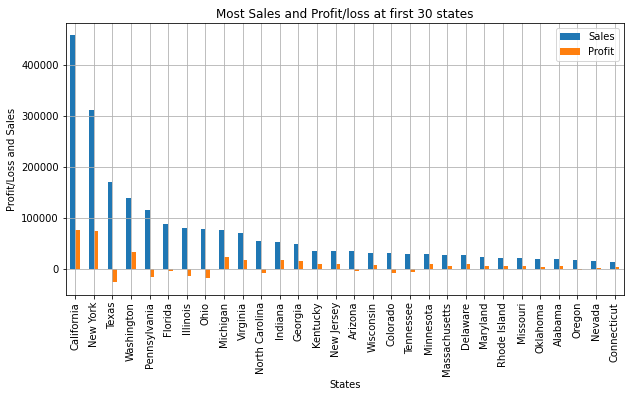

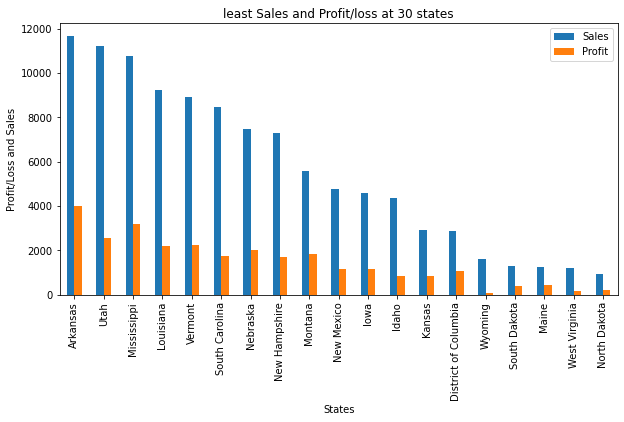

In [24]:
s=df.groupby('State')[["Sales","Profit"]].sum().sort_values(by="Sales",ascending=False)
plt.figure(figsize=(100,100))
s[:30].plot(kind='bar',figsize=(10,5))
plt.grid(True)
plt.title('Most Sales and Profit/loss at first 30 states')
plt.xlabel('States')
plt.ylabel('Profit/Loss and Sales')
s[30:].plot(kind='bar',figsize=(10,5))
plt.title('least Sales and Profit/loss at 30 states')
plt.xlabel('States')
plt.ylabel('Profit/Loss and Sales')


<ipython-input-25-d6887b53b075>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Sub-Category')['Profit','Sales'].sum().plot(kind='bar')


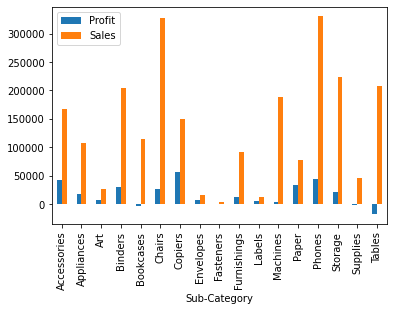

In [25]:
df.groupby('Sub-Category')['Profit','Sales'].sum().plot(kind='bar')

In [28]:
pd.DataFrame(df.groupby('State').sum())['Profit'].sort_values(ascending=True)

State
Texas                  -25750.9833
Ohio                   -16959.3178
Pennsylvania           -15565.4035
Illinois               -12601.6500
North Carolina          -7490.9122
Colorado                -6527.8579
Tennessee               -5341.6936
Arizona                 -3427.9246
Florida                 -3399.3017
Oregon                  -1194.0993
Wyoming                   100.1960
West Virginia             185.9216
North Dakota              230.1497
South Dakota              394.8283
Maine                     454.4862
Idaho                     826.7231
Kansas                    836.4435
District of Columbia     1059.5893
New Mexico               1157.1161
Iowa                     1183.8119
New Hampshire            1706.5028
South Carolina           1769.0566
Montana                  1833.3285
Nebraska                 2037.0942
Louisiana                2196.1023
Vermont                  2244.9783
Utah                     2546.5335
Mississippi              3172.9762
Nevada        

In [29]:
pd.DataFrame(df.groupby('State').sum())['Discount'].sort_values(ascending=False)

State
Texas                   364.24
Pennsylvania            192.70
Illinois                191.10
Ohio                    152.10
California              145.60
Florida                 114.65
North Carolina           70.60
Arizona                  68.00
New York                 62.40
Colorado                 57.60
Tennessee                53.30
Oregon                   35.60
Washington               32.40
Utah                      3.20
Nevada                    2.40
New Mexico                2.20
Massachusetts             2.10
Michigan                  1.80
Idaho                     1.80
Rhode Island              1.20
Montana                   1.00
Delaware                  0.60
New Jersey                0.60
Connecticut               0.60
Maryland                  0.60
New Hampshire             0.30
West Virginia             0.30
Wyoming                   0.20
Minnesota                 0.00
Georgia                   0.00
Virginia                  0.00
Arkansas                  0.00
Ve

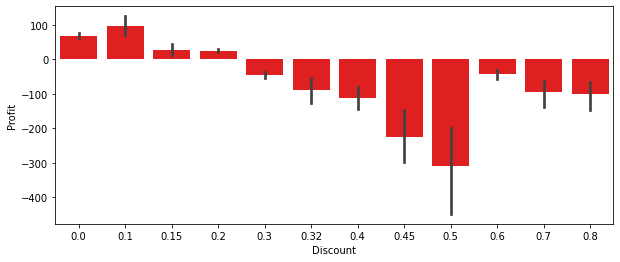

In [43]:
plt.figure(figsize=(10,4))
sns.barplot('Discount', 'Profit', data = df, color = 'r', label= 'Discount')

# Suggestions and Observation after Exploring the data

In [2]:
#There is correlation between sales and profit
#Standard class ship mode was the most used mode.
#West region has most of the customers followed by East and Central region. So,company can target these regions for better target customers.
#Offices supplies were sold the most. So, the company should invest most on the office supplies and leats on Furtinture and Technology.
#Top 5 sold product sub category are:- Blinders>Paper>Furnishings>Phones>Art
#Top 5 Profitable States:- California>New York>Washington>Michigan>Virginia
#Top 5 states with loss:- Texas>Pennsylvania>Florida>Illinios
#So, Company facing loss at states with most sales than states with least sales.
#Copiers have most profit with less sale and Tables are at loss so, tables sale should be stopped.
#Greater discount is leading to more loss. So, discount value should be decreased.

